<a href="https://colab.research.google.com/github/Raimundo1719/Intro-to-AI-Capstone/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Apply the K-Nearest Neighbors (KNN) algorithm to a real dataset, evaluate model performance, and explore the impact of hyperparameters and feature scaling.

## Load and Explore Iris Dataset

Load the Iris dataset using scikit-learn's `load_iris` function. Display the first few rows, summary statistics, and check for any missing values.


In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Convert to a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows
print("First 5 rows of the Iris dataset:")
print(df.head())

# Display descriptive statistics
print("\nDescriptive statistics of the Iris dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the Iris dataset:")
print(df.isnull().sum())

First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Descriptive statistics of the Iris dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%       

## Visualize Feature Distributions

Generate visualizations, such as histograms or scatter plots, to understand the distribution of features in the Iris dataset and their relationships. Ensure all legends are provided.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add the target variable to the DataFrame for visualization purposes
df['species'] = iris.target_names[iris.target]

print("Libraries imported and 'species' column added to DataFrame.")

Libraries imported and 'species' column added to DataFrame.


Now that the libraries are imported and the 'species' column is added, I will generate histograms for each numerical feature in the DataFrame to visualize their distributions, as requested in the subtask. This will provide insights into the individual feature characteristics.



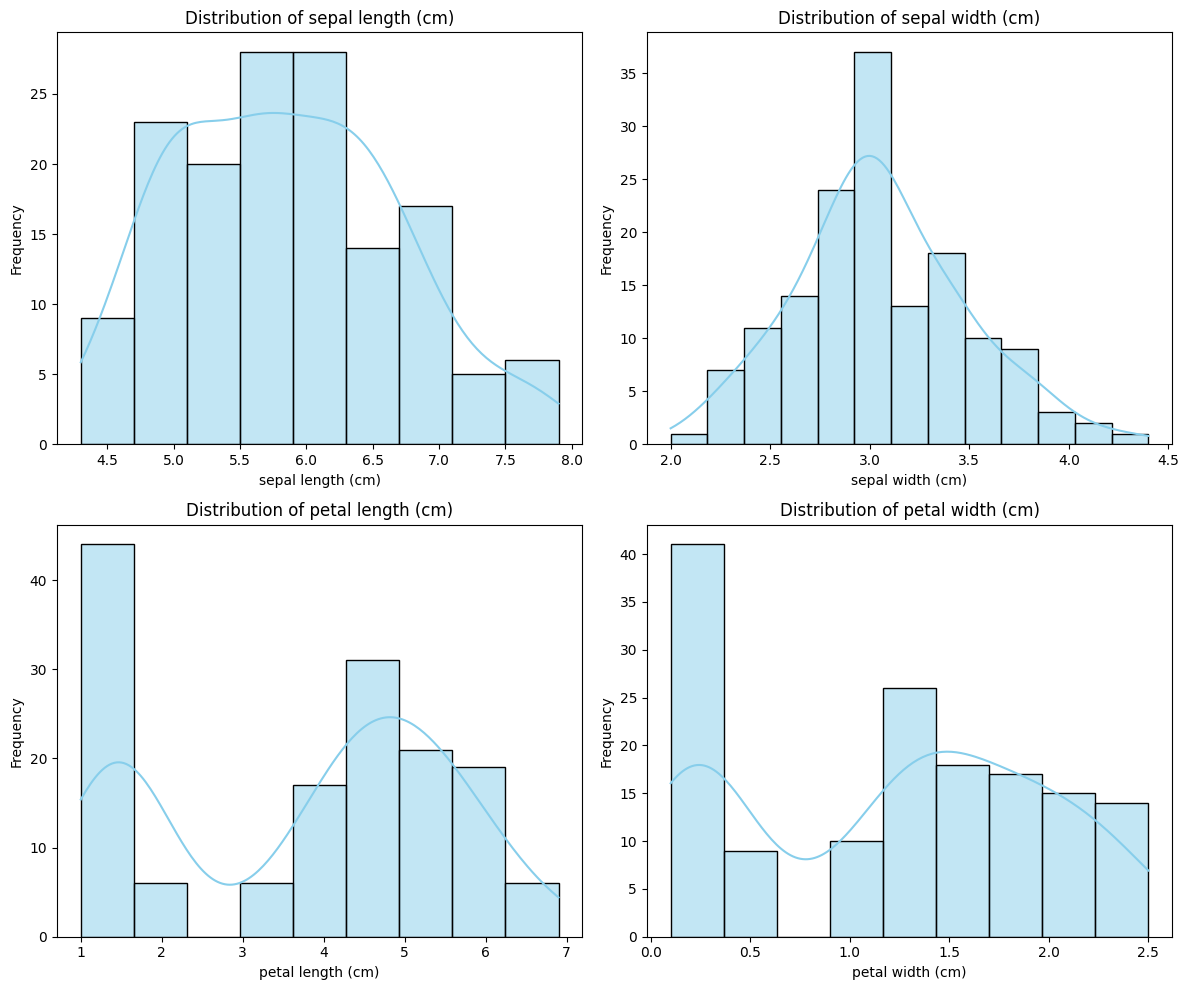

Histograms for each feature generated.


In [3]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns[:-1]): # Exclude the 'species' column
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for each feature generated.")

To further understand the relationships between features and how they differentiate between species, I will generate a pair plot as requested in the subtask. This visualization will display scatter plots for all pairwise relationships and histograms for individual feature distributions, color-coded by species.



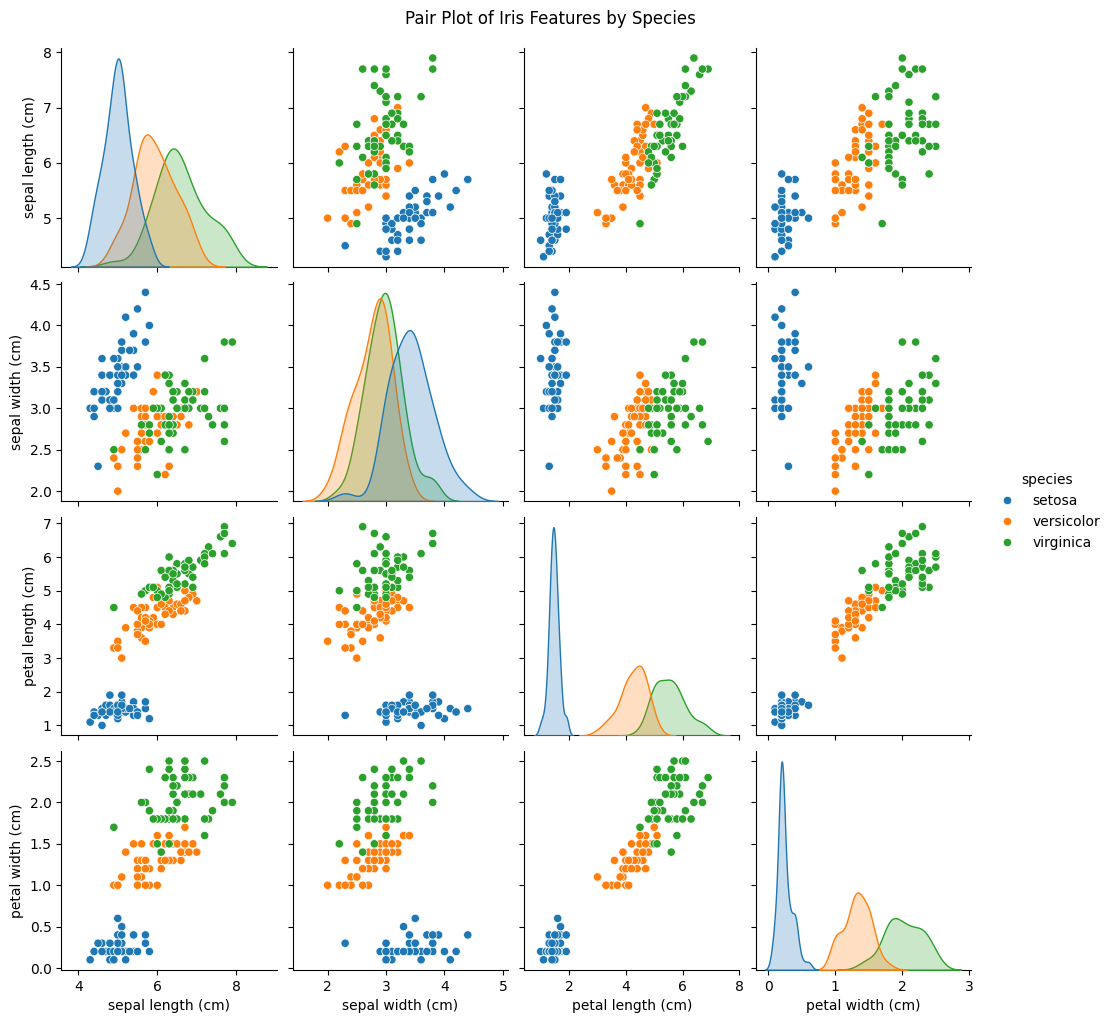

Pair plot generated.


In [4]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02) # Adjust suptitle to not overlap with subplots
plt.show()

print("Pair plot generated.")

## K-Nearest Neighbors Classification (Initial)

Split the dataset into training and test sets, which will be 75% and 25% respectively. Train a KNeighborsClassifier with n_neighbors=1 and evaluate its accuracy on the test set. Also, make a prediction for a new, hypothetical iris measurement, meaning I will be using mean or median values for features as a starting point.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Separate features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Features (X) and target (y) separated, and data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Features (X) and target (y) separated, and data split into training and testing sets.
X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


In [6]:
knn = KNeighborsClassifier(n_neighbors=1)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN (n_neighbors=1) on the test set: {accuracy:.2f}")

# Create a hypothetical new iris measurement using the mean of the features
hypothetical_iris = X.mean().values.reshape(1, -1)

# Predict the species of the hypothetical iris
hypothetical_prediction = knn.predict(hypothetical_iris)
print(f"Prediction for hypothetical iris measurement (mean values): {hypothetical_prediction[0]}")

Accuracy of KNN (n_neighbors=1) on the test set: 1.00
Prediction for hypothetical iris measurement (mean values): versicolor


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The previous cell produced a UserWarning because the hypothetical iris measurement used for prediction did not retain feature names. To resolve this, I will recreate the hypothetical iris measurement as a pandas DataFrame with the correct column names, matching the training data's structure.



In [7]:
knn = KNeighborsClassifier(n_neighbors=1)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN (n_neighbors=1) on the test set: {accuracy:.2f}")

# Create a hypothetical new iris measurement using the mean of the features
hypothetical_iris = pd.DataFrame(X.mean().values.reshape(1, -1), columns=X.columns)

# Predict the species of the hypothetical iris
hypothetical_prediction = knn.predict(hypothetical_iris)
print(f"Prediction for hypothetical iris measurement (mean values): {hypothetical_prediction[0]}")

Accuracy of KNN (n_neighbors=1) on the test set: 1.00
Prediction for hypothetical iris measurement (mean values): versicolor


## Hyperparameter Tuning and Evaluation

Vary the `n_neighbors` parameter (K) for the KNeighborsClassifier. For that I will change the K values to be 1, 3, 5, and 9. For each K, I will calculate and store both training and test accuracies. Then I will plot the training and test accuracies against the different K values, ensuring all legends are provided.


I will define a list of K values, iterate through them to train KNN models, calculate and store both training and test accuracies, and then plot these accuracies against the K values to visualize the model's performance for different hyperparameters.



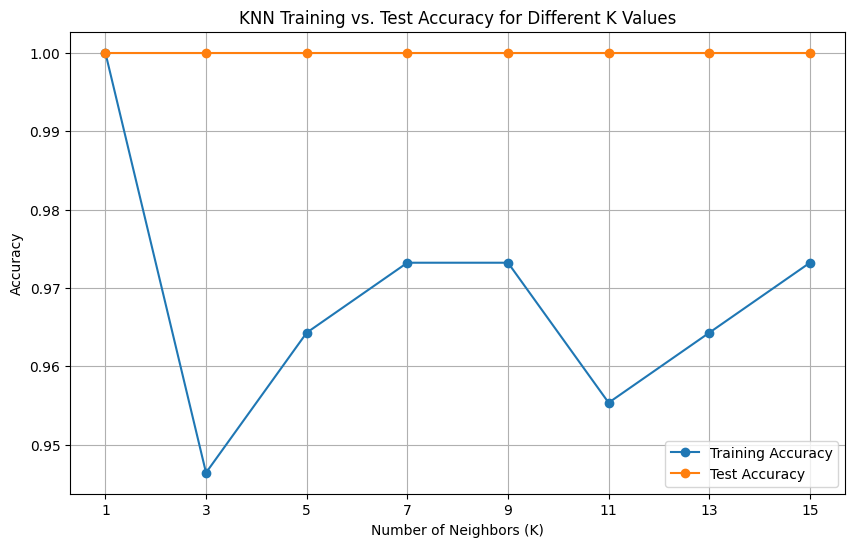

KNN training and test accuracies calculated and plotted for various K values.


In [8]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('KNN Training vs. Test Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

print("KNN training and test accuracies calculated and plotted for various K values.")

## Feature Scaling and Re-evaluation

I will apply feature scaling such as StandardScaler or MinMaxScaler to the Iris dataset. Then I will repeat the hyperparameter tuning and evaluation process from the previous step with the scaled data, plotting the new training and test accuracies against different K values, again, ensuring all legends are provided.


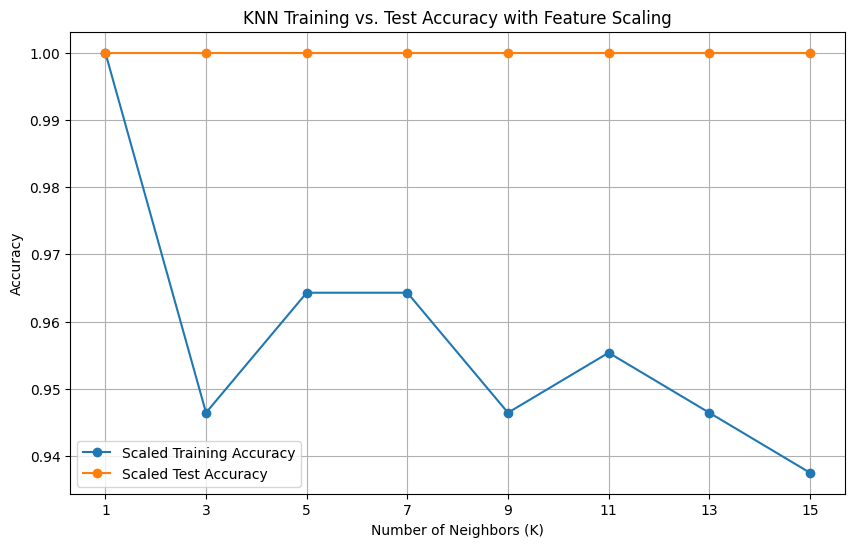

Feature scaling applied, and KNN training/test accuracies for scaled data calculated and plotted.


In [9]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize lists to store accuracies for scaled data
scaled_train_accuracies = []
scaled_test_accuracies = []

# Repeat hyperparameter tuning with scaled data
for k in k_values:
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    scaled_train_accuracies.append(knn_scaled.score(X_train_scaled, y_train))
    scaled_test_accuracies.append(knn_scaled.score(X_test_scaled, y_test))

# Plot the training and test accuracies for scaled data
plt.figure(figsize=(10, 6))
plt.plot(k_values, scaled_train_accuracies, label='Scaled Training Accuracy', marker='o')
plt.plot(k_values, scaled_test_accuracies, label='Scaled Test Accuracy', marker='o')
plt.title('KNN Training vs. Test Accuracy with Feature Scaling')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

print("Feature scaling applied, and KNN training/test accuracies for scaled data calculated and plotted.")

#### Reflection

#### How increasing K affects bias and variance

Low K:

When K is 1, the model is highly sensitive to individual data points. This seems to lead to the data having low bias, as the model can fit the training data very closely, but it also seems to greatly impact the decsision boundary as small changes are made.

High K:

As K increases, the model considers more neighbors, leading to a smoother decision boundary. This generally increases its bias as the model becomes less flexible and might try to oversimplify the underlying patterns but decreases the amount of change as the model becomes less sensitive to noise or outliers in the training data.

#### Discussion of whether feature scaling improved model performance and why

In this particular instance with the Iris dataset and the specific train-test split, feature scaling did not visibly improve the overall model performance in terms of test accuracy, as both scaled and unscaled models achieved perfect accuracy of 1.0, or 100% across all tested K values. There might be a slight difference in training accuracy trends, but the ultimate performance on the test set remained the same.


#### Importance of Hyperparameter K
It is quite important to choose right K value for this model. While a very small K, like K=1, can lead to a model that's too sensitive to individual data points and might perform perfectly on the training data but less so on new, unseen data, bringing high variance and overfitting. A larger K can smooth out noise and generalize better. However, if K is too large, the model might start considering neighbors that are too far away or belong to different classes, leading to underfitting, or a high bias. In our case, for the Iris dataset, where K=1 has already achieved very high accuracy, it suggests the data is quite separable, but in real-world scenarios, tuning K is often essential to find the best balance between capturing the patterns in the data and avoiding noise.

#### Role and Importance of Feature Scaling
Feature scaling is a preprocessing step where we adjust the range of features so they all contribute equally to the distance calculation. It's particularly important for distance-based algorithms like KNN. Imagine if one feature, like 'sepal length', ranged from 0 to 1000, and another, 'sepal width', ranged from 0 to 1. Without scaling, the 'sepal length' would dominate the distance calculation simply because its values are much larger, making other features almost irrelevant. By using StandardScaler, we transform the data so that each feature has a mean of 0 and a standard deviation of 1. Although its impact wasn't significantly visible in this specific Iris dataset, which is likely due to the features already having relatively similar scales and clear separation, feature scaling is generally highly recommended. It ensures that no single feature unfairly influences the distance metric, allowing the algorithm to correctly identify the closest neighbors based on all relevant features.

#### Strengths and Weaknesses of the KNN Algorithm
**Simple to Understand:** KNN works on a very intuitively. To classify a new item, it just looks at its closest neighbors and assigns it the most common category among them. There's no complicated math or assumptions about the data are needed.

**No Training Phase:** Unlike many other models that spend time learning patterns before making predictions, KNN simply remembers all the data it sees. It only "learns" when it's asked to classify a new point, making it flexible.

**Effective for Simple Problems:** For datasets where classes are clearly separated and not too complex, KNN can be very accurate and provide good results.

**Slow with Lots of Data:** Because KNN has to compare a new item to every single other item in the dataset to find its neighbors, it can become very slow when dealing with large amounts of data.

**Sensitive to "Noisy" or Irrelevant Features:** If your data has many features that don't actually help distinguish between categories, or if there's a lot of irrelevant information, KNN can get confused. It treats all features equally, unless you apply specific techniques, making it hard to find the true neighbors.

**Struggles with Imbalanced Data:** If one category has many more examples than another, a new item might be incorrectly classified into the larger category simply because there are more neighbors from that category nearby, even if it truly belongs to the smaller one.

**Needs Feature Scaling:** If features have very different scales, like one measured in centimeters and another in kilometers, features with larger values can unfairly dominate the distance calculation, leading to incorrect neighbor identification.